# Performing Analysis of Meteorological Data


## Problem statement:

### The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming"
The H0 means we need to find whether the average Apparent temperature for the month of a month say April starting from 2006 to 2016 and the average humidity for the same period have increased or not. This monthly analysis has to be done for all 12 months over the 10 year period. So you are basically resampling your data from hourly to monthly, then comparing the same month over the 10 year period. Support your analysis by appropriate visualizations using matplotlib and / or seaborn library.

### Dataset Description

Formatted Date: An international standard covering the worldwide exchange and communication of date and time-related data

Summary: Hourly report of whether

Precip Type: In meteorology, the different types of precipitation often include the character, formation, or phase of the precipitation which is falling to ground level.

Temperature (C): Temperature recorded in celcius

Apparent Temperature (C): Apparent temperature, also known as feels like, is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed

Humidity: Humidity is the concentration of water vapor present in the air

Wind Speed (km/h): In meteorology, wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature.

Wind Bearing (degrees) :Wind direction is generally reported by the direction from which it originates

Visibility (km): The visibility is the measure of the distance at which an object or light can be clearly discerned

Pressure: It is the force exerted on a surface by the air above it as gravity pulls it to Earth.

Daily Summary: Summary of whether

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('weatherHistory[1].csv')

In [3]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
#Checking no of rows and columns
df.shape

(96453, 12)

In [5]:
# checking data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
# Checking the null values
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
#Calculating null percentage of each columns
missing_percent = 100 * df.isna().sum() / len(df.index)

In [8]:
missing_percent

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64

In [9]:
#stastistical observations
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


#### Observation
'Formatted Date' is object data type but should be data time format.

We can see 'Precip Type' have 517 null values

In statistical observations  "Humidity", "Wind Speed", "Wind Bearing", "Visibility", "Pressure" has minimun value 0.

In [10]:
#creating copy of dataframe
df_new = df.copy()

In [11]:
# convertinf 'Formatted Date' column from object datatype to date time format
df_new['Formatted Date'] = pd.to_datetime(df_new['Formatted Date'], utc=True)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [13]:
#setting index of rows as formatted data 
df_new = df_new.set_index('Formatted Date')
df_new.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#### The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming" So we need to resample our data from hourly to monthly, hen comparing the same month over the 10 year period.

# Resampling Dataset from Hourly to Monthly

In [14]:
#New Dataframe for resampling data we need to put Apparent temperature and humidity 
column_needed = ['Apparent Temperature (C)','Humidity']
df_monthly = df_new[column_needed].resample('MS').mean()

In [15]:
df_monthly.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


In [16]:
df_monthly.describe()

,Apparent Temperature (C),Humidity
count,133.000000,133.000000
mean,10.689657,0.736422
std,9.178501,0.101570
min,-8.817241,0.491250
25%,1.969780,0.669328
50%,11.782770,0.735309
75%,19.526790,0.823965
max,24.525343,0.925390


<Figure size 1008x1080 with 0 Axes>

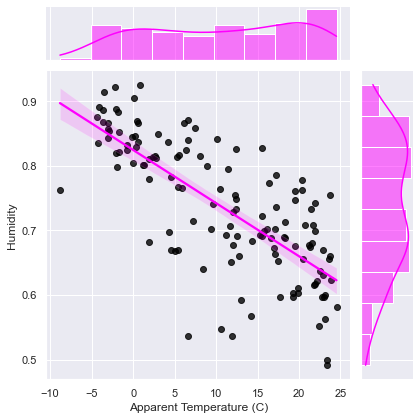

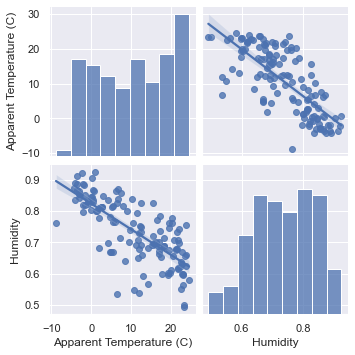

In [17]:
# Relation between Apparent Temperature and Humidity
plt.figure(figsize=(14,15))
x = df_monthly['Apparent Temperature (C)']
y = df_monthly['Humidity']
sns.set_theme(style="darkgrid")
sns.jointplot(x,y,kind = 'reg', color='fuchsia', scatter_kws={'color': "black"})
sns.pairplot(data=df_monthly,kind='reg')

### "Apparent Temperature" and "Humidity" have negetive linear relation

<AxesSubplot:title={'center':'Apparent temperature changes monthly across 10 years'}, xlabel='Formatted Date', ylabel='Apparent Temperature (C)'>

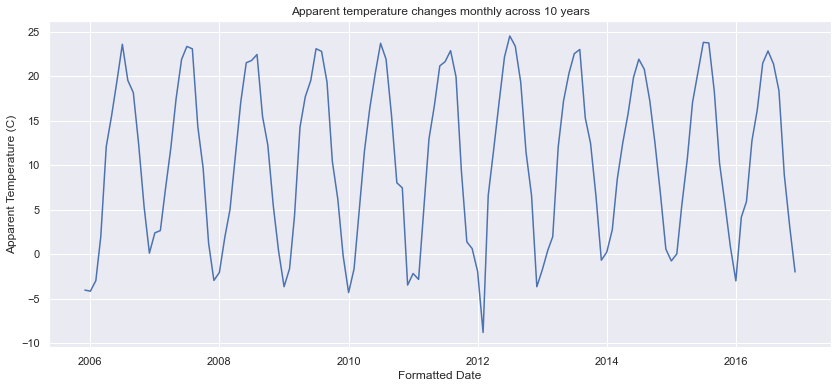

In [18]:
# Apparent Temperature across 10 years
plt.figure(figsize=(14,6))
plt.title('Apparent temperature changes monthly across 10 years')
sns.lineplot(data=df_monthly['Apparent Temperature (C)'] )

<AxesSubplot:title={'center':'Humidity changes monthly across 10 years'}, xlabel='Formatted Date', ylabel='Humidity'>

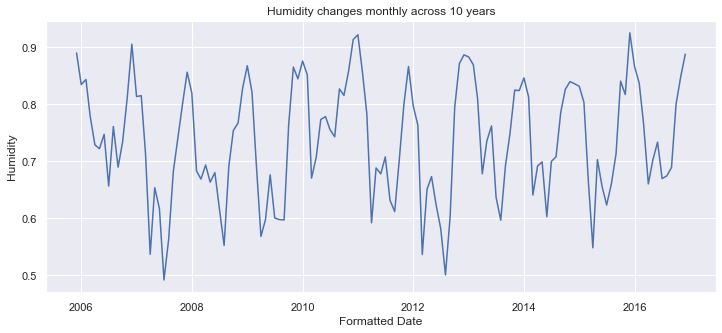

In [19]:
# Humidity across 10 years
plt.figure(figsize=(12,5))
plt.title('Humidity changes monthly across 10 years')
sns.lineplot(data=df_monthly['Humidity'])


### We can see from above plot that "Apparent Temperature" varies from -10°C to 24°C across 10 years.
### Humidity is measured in scale of 0.4 to 1.0 so we used seperate graphs

In [20]:
# monthly dataFrame for 12 months across 10 years i.e from 2006 to 2016 
jan = df_monthly[df_monthly.index.month==1]
feb = df_monthly[df_monthly.index.month==2]
mar = df_monthly[df_monthly.index.month==3]
apr = df_monthly[df_monthly.index.month==4]
may = df_monthly[df_monthly.index.month==5]
jun = df_monthly[df_monthly.index.month==6]
jul = df_monthly[df_monthly.index.month==7]
aug = df_monthly[df_monthly.index.month==8]
sep = df_monthly[df_monthly.index.month==9]
octo = df_monthly[df_monthly.index.month==10]
nov = df_monthly[df_monthly.index.month==11]
dec = df_monthly[df_monthly.index.month==12]


In [21]:
jan.head(3)

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2007-01-01 00:00:00+00:00,2.387015,0.813495
2008-01-01 00:00:00+00:00,-2.069907,0.819476


In [22]:
# reating function for Apparent Temperature (C) plots across 10 years
def plot_t(month,a):
    plt.figure(figsize=(10,5))
    plt.plot(month.loc[f'2006-{a}-01':f'2016-{a}-01','Apparent Temperature (C)'],marker='o',label='Apparent Temperature (C)',color ='crimson')
    plt.title(f'Apparent Temperature (C) variation from {a}/2006 TO {a}/2016',fontsize = 17)
    plt.show

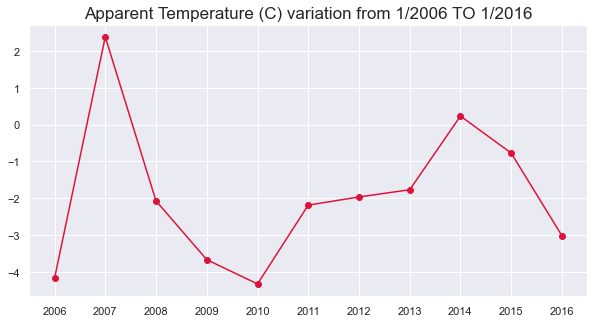

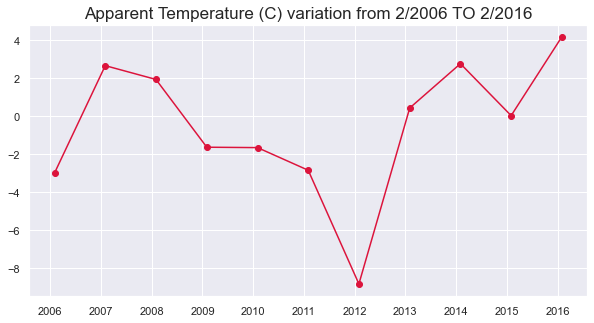

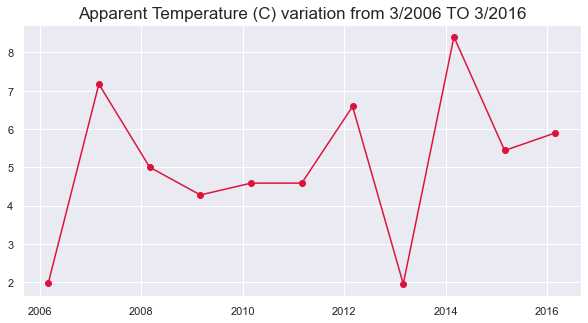

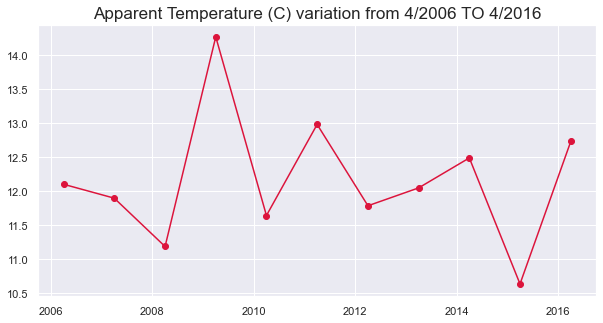

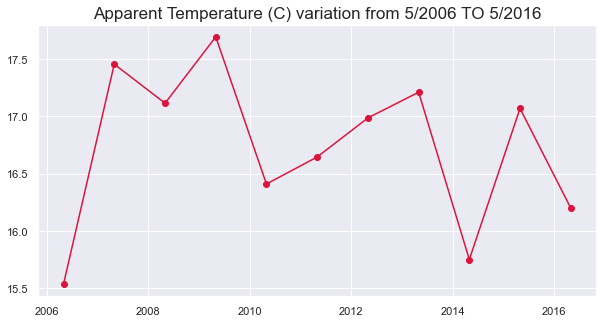

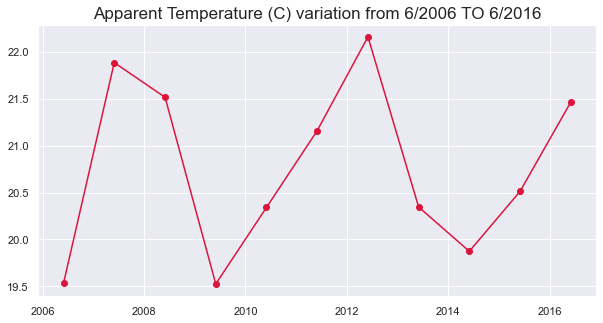

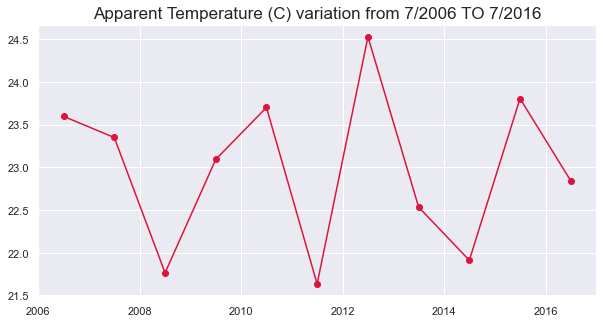

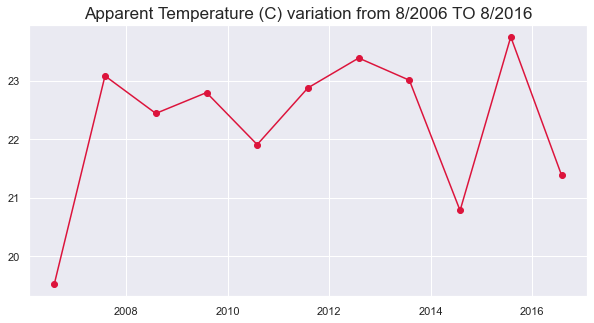

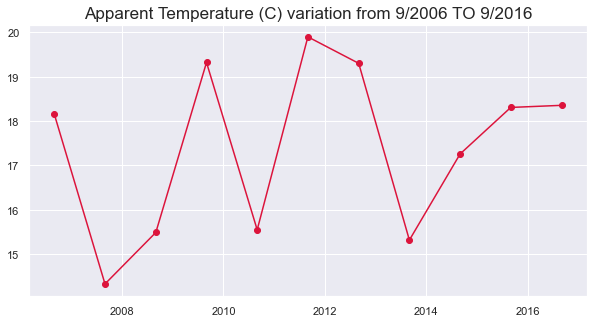

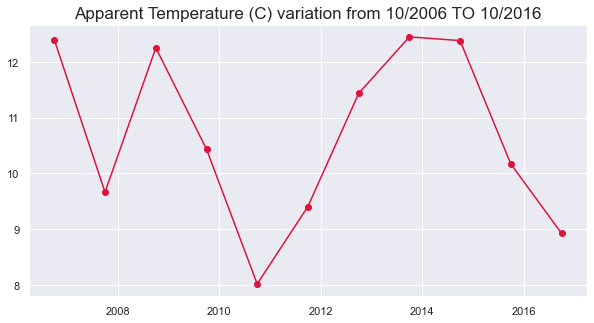

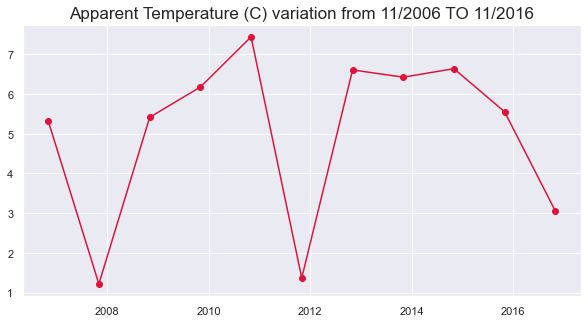

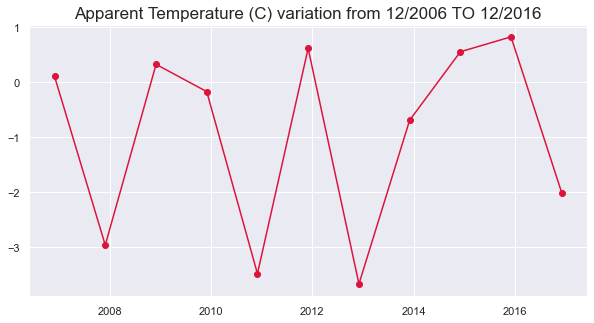

In [23]:
# 12 Months plot for change in Apparent temperature over 10 years
plot_t(jan,1)
plot_t(feb,2)
plot_t(mar,3)
plot_t(apr,4)
plot_t(may,5)
plot_t(jun,6)
plot_t(jul,7)
plot_t(aug,8)
plot_t(sep,9)
plot_t(octo,10)
plot_t(nov,11)
plot_t(dec,12)

In [24]:
# Creating function for Humidity plots across 10 years
def plot_h(month,a):
    plt.figure(figsize=(10,5))
    plt.plot(month.loc[f'2006-{a}-01':f'2016-{a}-01','Humidity'],marker='o',color='indigo')
    plt.title(f'Humidity variation in {a}/2006 TO {a}/2016',fontsize = 17)
    plt.show

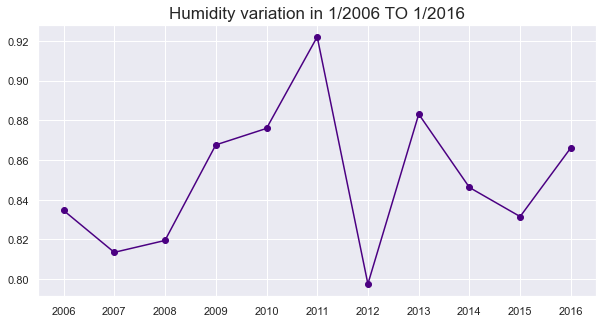

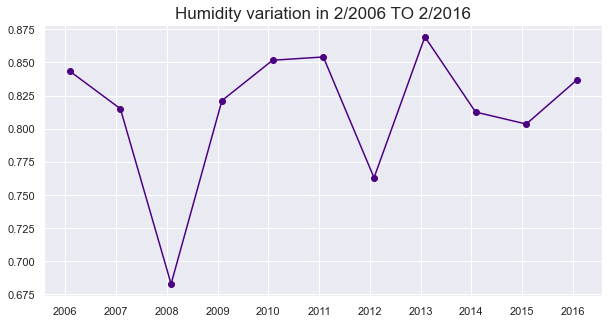

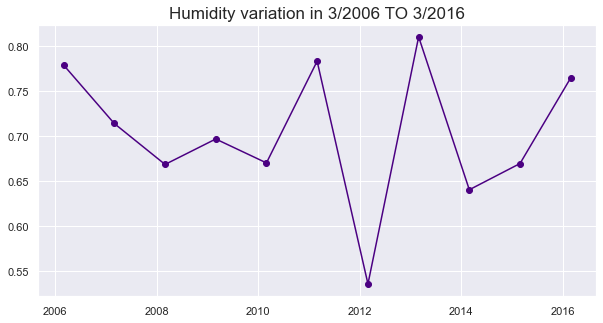

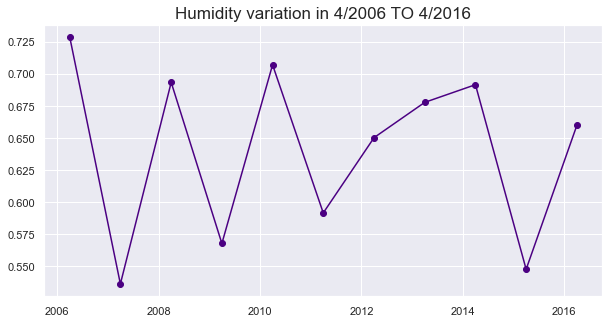

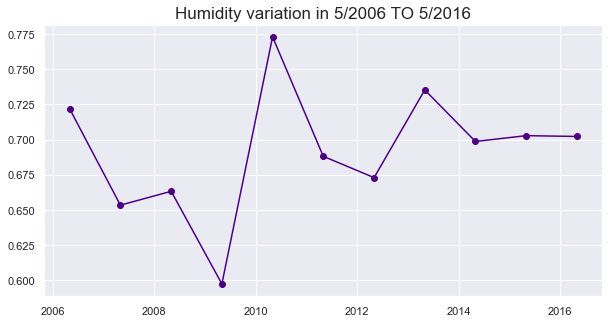

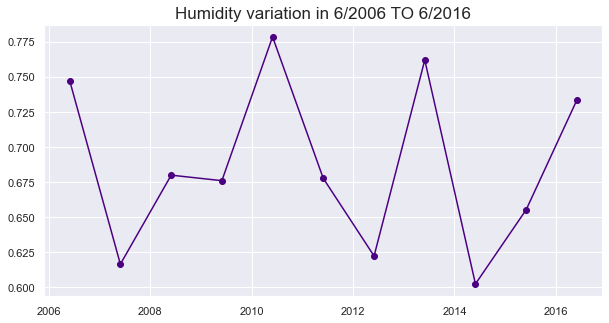

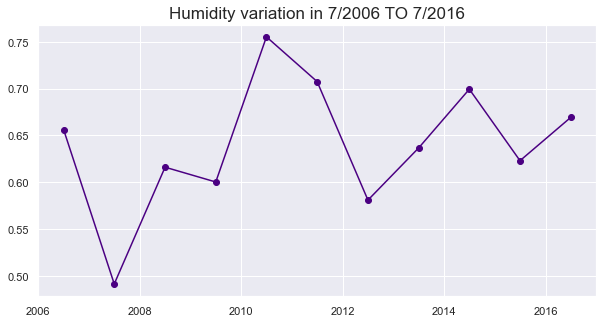

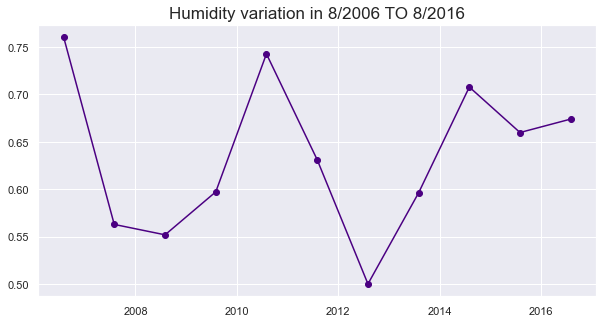

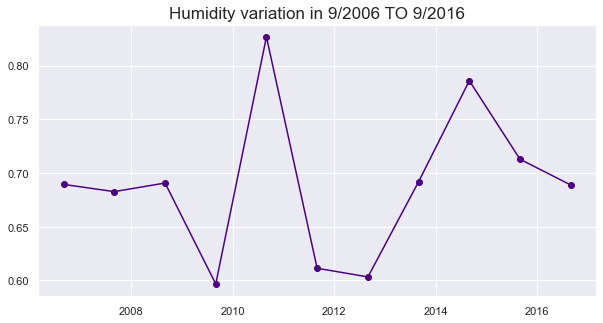

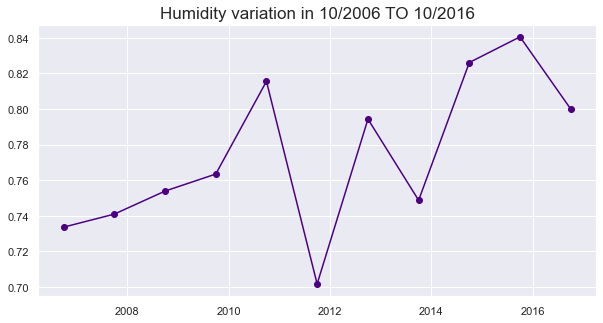

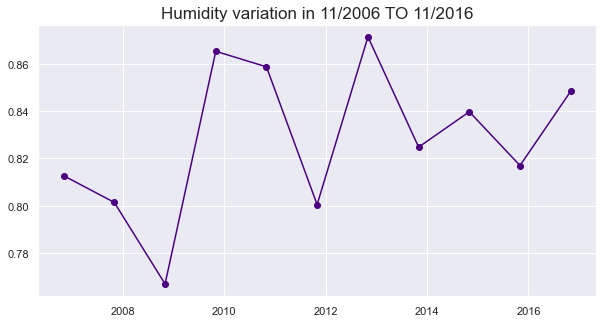

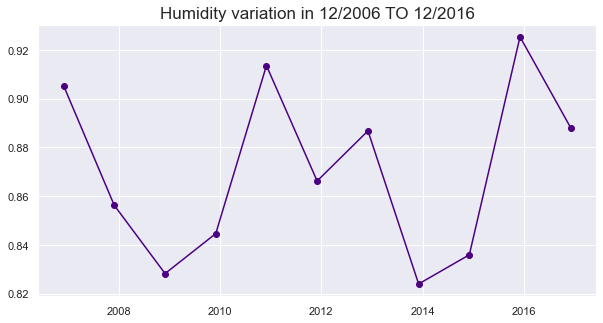

In [25]:
# 12 Months plot for change in Humidity over 10 years
plot_h(jan,1)
plot_h(feb,2)
plot_h(mar,3)
plot_h(apr,4)
plot_h(may,5)
plot_h(jun,6)
plot_h(jul,7)
plot_h(aug,8)
plot_h(sep,9)
plot_h(octo,10)
plot_h(nov,11)
plot_h(dec,12)

# Conclusion:

### From above plots we can conclude that Humidity and Apparent Temperature Varies Over the Months across 10 years.
### 'Apparent Temperature' and 'Humidity' have negetive linear relation.
### 'Humidity' varies from 0.4 to 1 across 10 years and in year 2007 & 2011 have minimun and maximum respectively.
### 'Apparent Temperature' varies from -10°C to 24°C across 10 years and in year 2012 have most drastic change in temperature.